In [33]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

In this notebook, we are answering questions in the section 1.7.1 of Statistics and Data Analysis \cite{statsAndData}.

<h1>Excercises 1.7,1</h1>
<h2>Exercise 2</h2>
<p>We skip the first question because we only need use the Pandas series or data frame describe function to do that one. For exercise 2 the authors ask us to compare data sets to see how statistics that are not robust change when we introduce extreme values to the dataset.</p>
<p>The first dataset is:</p>

In [4]:
ds_1 = [102, 131, 137, 63, 42, 12, 23, 49, 63, 21, 56, 68, 35,
        63, 62, 19, 85, 38, 76, 29, 31, 16, 0, 8, 47, 40, 2, 
        44, 8, 16, 7, 43, 2, 50, 22, 1, 51, 34, 4, 78]

The descriptive statistics for the data set are:

In [5]:
pd.Series(ds_1).describe()

count     40.000000
mean      41.950000
std       33.473258
min        0.000000
25%       16.000000
50%       39.000000
75%       62.250000
max      137.000000
dtype: float64

The second data set is:

In [7]:
ds_2 = [1020, 131, 137, 63, 42, 12, 23, 49, 63, 21, 56, 68, 35, 
        63, 62, 19, 85, 38, 76, 29, 31, 16, 0, 8, 47, 40, 2, 44, 8, 16,
       7, 43, 2, 50, 22, 1, 51, 34, 4, 78, ]

The descriptive statistics for this second data set are in the cell below.

In [8]:
pd.Series(ds_2).describe()

count      40.00000
mean       64.90000
std       158.16298
min         0.00000
25%        16.00000
50%        39.00000
75%        62.25000
max      1020.00000
dtype: float64

<p> We see that $Q_1$, $Q_2$, and $Q_3$ of both datasets do not change.  The standard deviation of the second data set is much larger than that of the first data set, and the mean is also larger. </p>
<h2> Exercises 3 and 4 </h2>
<p> For exercises 3 and 4, the authors ask us to do the same thing as in exercise 2, but replace the first element, 1020, in the second data set with 10200, and then 102000.  We do this without intervening commentary below. </p>

In [10]:
ds_3 = [10200]+ds_2[1:]
ds_4 = [102000] + ds_2[1:]

In [11]:
pd.Series(ds_3).describe()

count       40.000000
mean       294.400000
std       1606.691389
min          0.000000
25%         16.000000
50%         39.000000
75%         62.250000
max      10200.000000
dtype: float64

In [12]:
pd.Series(ds_4).describe()

count        40.000000
mean       2589.400000
std       16121.258454
min           0.000000
25%          16.000000
50%          39.000000
75%          62.250000
max      102000.000000
dtype: float64

<p> These descriptive statistics emphasize the robustness of $Q_1$, $Q_2$, and $Q_3$.  On the other hand we see how the other statistics are impacted by how we increase the magnitude of the first parameter. </p>

<h2> Exercise 5 </h2>
<p> For exercise 5 the authors require us to compare two data sets of silver content of two sets of coins, $C_1$, and $C_2$.  Specifically, they ask us to draw box plots of the data in $C_1$, and $C_2$, and write a hypothesis as to whether or not one set has coins with a lower silver content. </p> 
<p>We create lists containing the data, one for each set, first. </p>

In [13]:
c1 = [6.9, 6.2, 5.9, 6.8, 6.4, 7.0, 6.6, 7.7, 7.2]
c2 = [5.3, 5.6, 5.5, 5.1, 6.2, 5.8, 5.8]

<p> The sets are different sizes, so we pad the smaller one with not-a-number values before we can draw the box plots with Python's Seaborn library. </p>

In [20]:
c2_padded = c2 + ( [ np.NaN ] * ( len( c2 ) - len( c1) ) )

<p> We add labels to the elements of both sets, and put the result into a Pandas data frame. </p>

In [25]:
minting_df = pd.DataFrame( { 'minting' : ( [ 'first minting' ] * len( c1 ) ) + ( [ 'fourth minting' ] *len( c2 )),
    'silver percentage' : (c1 + c2) } )

<p> Now that we have the minting_df data frame, we can draw the box plots. </p>

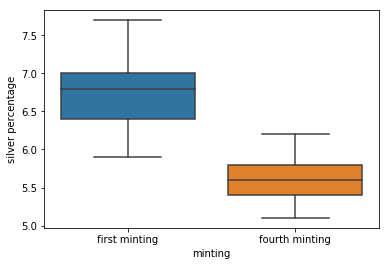

In [26]:
sns.boxplot(data=minting_df, x='minting', y='silver percentage')

<p> We see from the box plots above that there is no overlap in the interquartile ranges of the first minting and the fourth minting.  This is an indication that coins from the fourth minting have a lower silver content than coins from the first minting. </p>

<h2> Exercise 6 </h2>
<p> Exercise 6 is also an exercise in comparing two sets of data.  The first thing the authors require of us is to create comparison plots of the data. We assume the authors want comparison box plots.  The authors ask us to reflect on the comparison box plots, and make a hypothesis about whether or this drug A is effective.  If the drug is effective, then the box plots should show that the LDL measurements in the first data set are lower than the LDL measurements in the second data set.  We store the data in the first data set in the list </p>
<pre> drug_A </pre>
<p> in the cell below.  We store the data in the second data set in the list </p>
<pre> placebo </pre> 
<p> in the cell below as well.  </p>

In [27]:
drug_A = [ 64, 49, 54, 64, 97, 66, 76, 44, 71, 89, 70, 72, 71, 55, 60, 62, 46, 77, 86, 71 ]
placebo = [ 40, 31, 50, 48, 152, 44, 74, 38, 81, 64 ]

<p> Again, we must pad the list </p>
<pre> placebo </pre>
<p> with Numpy not-a-number values in order to create the box plots. We also save the data, with parallel series of labels in the data frame</p>
<pre> drug_data.</pre>
<p> We create the box plots after that with no further remarks. </p>

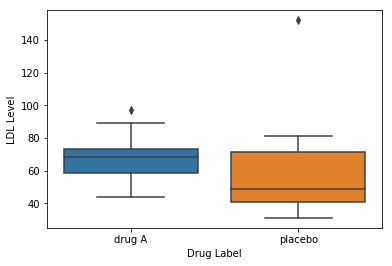

In [30]:
drug_data = pd.DataFrame( {'Drug Label': 
  ( [ 'drug A'  ] * len(drug_A) ) + ( [ 'placebo' ] * ( ( len(placebo) + ( len(drug_A) - len(placebo) ) ) ) ),
  'LDL Level': drug_A + placebo + ( [ np.NaN ] * (len( drug_A ) - len( placebo ) ) ) } )
sns.boxplot(data=drug_data, x = 'Drug Label', y = 'LDL Level')

<p> In the box plots above, we see that the interquartile range of the LDL levels of the ducks that received the placebo in their food contains the interquartile range of the LDL levels of the ducks that received drug A.  However, we hypothesize that drug A has the opposite of its intended effect - it appears to us that drug A has the effect of boosting the LDL levels in the ducks that the experimenters administered drug at to.</p>
<p> The second part of exercise 6 requires us to compute the descriptive statistics for both datasets, and decide on a pair of statistics to compare that provides the most meaningful comparison. </p>
<p> The descriptive statistics are in the cell below. </p>

In [31]:
pd.Series(drug_A).describe()

count    20.000000
mean     67.200000
std      13.968385
min      44.000000
25%      58.750000
50%      68.000000
75%      73.000000
max      97.000000
dtype: float64

In [32]:
pd.Series(placebo).describe()

count     10.000000
mean      62.200000
std       35.423784
min       31.000000
25%       41.000000
50%       49.000000
75%       71.500000
max      152.000000
dtype: float64

<p> We find the 25th, 50th, and 75th percentiles important to compare.  These statistics show that the lowest LDL levels in the ducks that receive drug A are higher than the lowest LDL levels in the ducks that receive the placebo, and so on for each pair of percentiles.  This comparison shows that any duck that receives drug A has a higher LDL level than some duck that receives the placebo when we use statistics that are robust to outliers. </p>

In [ ]:
%%latex
\begin{thebibliography}{99}

\bibitem{statsAndData} A.Abebe, J. Daniels, and J. W. McKean, \textit{Statistics and Data Analysis},
  2nd ed. Western Michigan University,Kalamzoo, MI: Statistical Computation Lab (SCL), 2001. [E-book] Available:
  \url{http://www.stat.wmich.edu/s160/hcopy/book.pdf}.


\end{thebibliography}